# Upper Confidence Bound (UCB)

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [34]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [35]:
# --- Step 1 ---
N = 10000                       # num of users
d = 10                          # num of ad
ads_selected = []
number_of_selections = [0]*d    # Ni(n)
sum_of_rewards = [0]*d          # Ri(n)
tot_reward = 0

# --- Step 2 ---
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if number_of_selections[i] > 0:
            avg_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/number_of_selections[i])
            upper_bound = avg_reward + delta_i
        # --- Step 3 ---
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] += sum_of_rewards[ad] + reward
    tot_reward = tot_reward + reward

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_13368\3327108488.py:27: RuntimeWarning: overflow encountered in scalar add
  sum_of_rewards[ad] += sum_of_rewards[ad] + reward


## Visualising the results

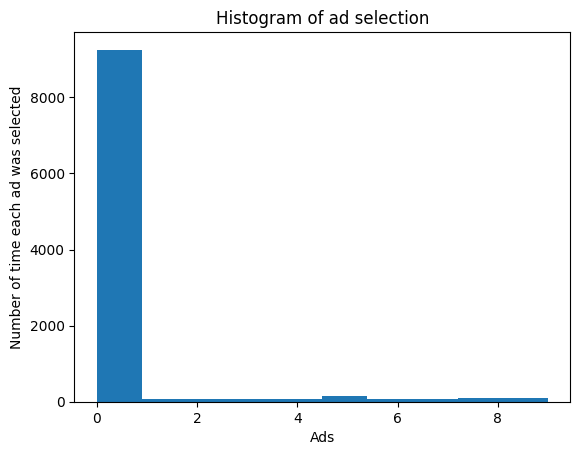

In [36]:
plt.hist(ads_selected)
plt.title('Histogram of ad selection')
plt.xlabel('Ads')
plt.ylabel('Number of time each ad was selected')
plt.show()